Print the successive steps of Gaussian elimination on a matrix $H\in GF(q)^{m,n}$ while looking at the modifications on the corresponding factor graph 

## Dependencies and methods

In [255]:
using Plots
include("../code/headers.jl")

mpldefault (generic function with 1 method)

In [215]:
function gfref_history(H::Array{Int,2},
                q::Int=2,
                gfmult::OffsetArray{Int,2}=gftables(q)[1],
                gfdiv::OffsetArray{Int,2}=gftables(q)[3])

    !ispow(q, 2) && error("q must be a power of 2")
    !isgfq(H, q) && error("Matrix H has values outside GF(q) with q=$q")
    (m,n) = size(H)
    # Initialize pivot to zero
    p = 0
    
    H_history = [copy(H)]
    
    for c = 1:n
        if iszero(H[p+1:end,c])
            continue
        else
            p += 1
            # sort rows of H so that all zeros in the c-th column are at the bottom
            # H[p:end,:] .= sortslices(H[p:end,:], dims=1, rev=true,
            #     lt=(row1,row2)->row1[c]==0)
            H[p:end,:] .= sortslices(H[p:end,:], dims=1, rev=true)
            # Normalize row of the pivot to make it 1
            H[p,:] .= gfdiv[H[p,:], H[p,c]]
            # Apply row-wise xor to rows below the pivot
            for r = p+1:m
                if H[r,c] != 0
                    # Adjust to make pivot 1
                    f = gfdiv[H[p,c], H[r,c]]
                    H[r,:] .= xor.(gfmult[f, H[r,:]], H[p,:])
                    push!(H_history, copy(H))
                end
            end
            p == m && break
        end
    end
    return H_history
end

gfref_history (generic function with 4 methods)

In [256]:
function plot_gfref_history(H::Array{Int,2}, q::Int=2)
    m,n = size(H)
    H_history = gfref_history(H)
    plts = []
    for i in eachindex(H_history)
        push!(plts, plot(FactorGraph(H_history[i]), method=:stress))
        plt = Plots.plot(xlim=(0.5,n+0.5), ylim=(0.5,m+0.5), framestyle=:box, ticks=nothing, size=(400,300))
        m = size(H_history[i],1)
        for j in 1:m
            for k in 1:n
                annotate!((k, m-j+1,Plots.text(string(H_history[i][j,k]),15)))
            end
        end
        push!(plts,plt)
    end
    t = tuple(plts...)
    pl = Plots.plot(t..., layout=(length(H_history),2), size=(900,400*length(H_history)))
    return pl
end

plot_gfref_history (generic function with 2 methods)

## Generate a new instance here

In [251]:
q = 2
nvariables = 10
nfactors = 6

6

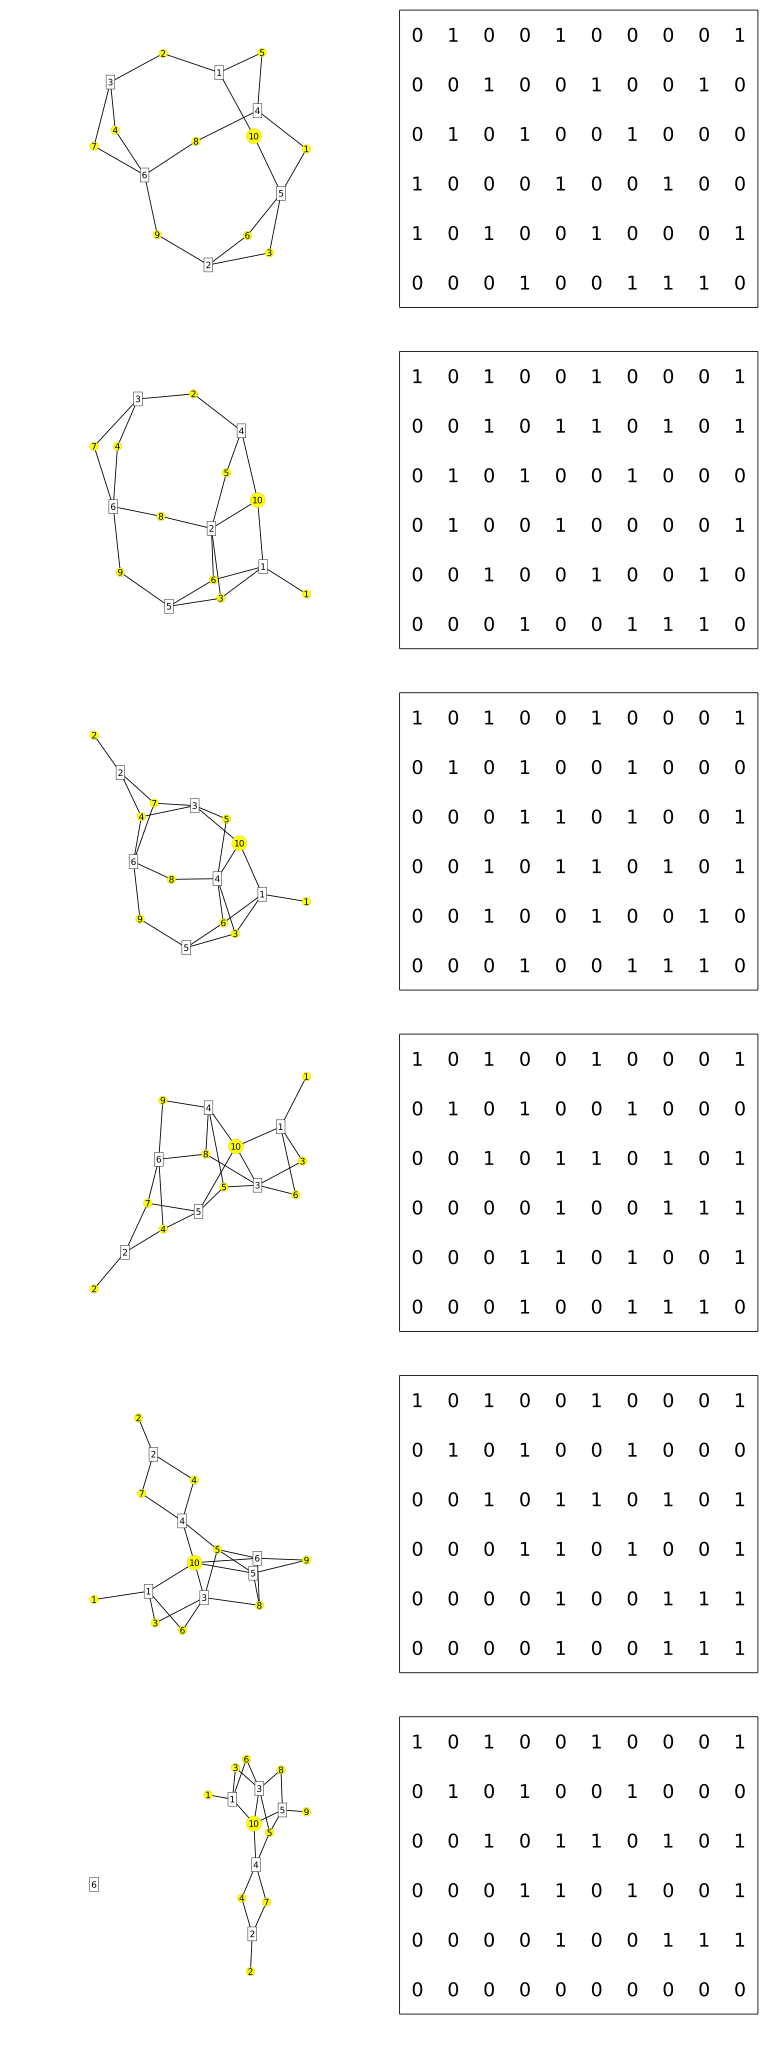

In [259]:
lm = LossyModel(q,nvariables, nfactors)
H = adjmat(lm)
plot_gfref_history(H,q)

It looks like at the end of Gaussian elimination, as many loops as possible have been converted into paths...